# **TD Detecting Higgs bosons**

##Purpose of the Lab and Methodological Overview

The purpose of this laboratory session is to apply and critically evaluate **advanced machine learning paradigms** on the challenging problem of Higgs Boson particle detection—a classification task characterized by **high dimensionality, noise, and complex feature interactions**. Students are guided through a structured experimental workflow designed to progressively incorporate increasingly sophisticated learning strategies.

In the first stage, students perform **data preparation and preprocessing**, addressing issues such as normalization, handling missing values, and feature extraction to ensure data suitability for machine learning. In the second stage, they implement baseline classifiers—including Decision Trees, Logistic Regression, and Bayesian models—to establish reference performance metrics without additional learning paradigms. The third stage introduces e**nsemble learning methods** (Bagging and Boosting), emphasizing how the aggregation of weak learners can enhance predictive stability and reduce variance. In the fourth stage, students integrate the **active learning paradigm** using the **modAL** Python library, enabling the model to iteratively query the most informative samples to reduce labeling effort while improving accuracy. Finally, in the fifth stage, they develop a **hybrid approach that combines ensemble and active learning**, exploring how sampling-based paradigms can synergize to handle the Higgs dataset’s inherent complexity.

Through this progressive design, the lab aims to foster a deep understanding of sampling-based paradigms as robust strategies for learning from difficult, imbalanced, or noisy data—illustrating their capacity to improve model generalization and efficiency in high-stakes scientific contexts such as particle physics.

## I- Pre-processing

### 1- Importing libraries

In [1]:
import numpy as np
import pandas as pd
import csv
import time
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


### 2- Reading CSV files
Data set available in http://opendata.cern.ch/record/328

**If the dataset is very large, you can select a sub-sample to work with.**.

In [4]:
dataFilename = '/content/atlas-higgs.csv'
data_complet = pd.read_csv(dataFilename)
#select only a sample
data = data_complet.sample(frac=0.1, random_state=42)
print(data.shape)
print(data.dtypes)
data.head()

(6561, 35)
EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                    float64
PRI_jet_leading_pt             float64
PRI_jet_leadin

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
41207,141207,104.357,41.501,67.130,64.341,6.226,1097.163,-9.532,2.541,1.864,...,-3.512,-0.441,39.856,2.714,1.305,99.515,0.000461,s,t,0.001503
22956,122956,76.622,3.563,54.568,36.062,-999.000,-999.000,-999.000,2.473,36.062,...,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0.443598,b,t,1.454848
47331,147331,80.642,6.625,53.578,89.037,4.183,376.870,-2.402,1.404,6.430,...,-3.496,-1.970,43.660,0.687,-1.019,93.714,0.094460,b,t,0.309795
3715,103715,150.845,41.272,93.685,86.949,1.583,181.401,3.590,2.529,20.717,...,-2.845,1.415,39.920,-1.262,-0.866,167.438,0.093659,b,t,0.307170
20902,120902,132.340,40.867,96.556,1.230,-999.000,-999.000,-999.000,3.006,1.230,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.005721,s,t,0.018636


### 3- Delete superfluous columns
Use the `del` function to delete the 'EventId', 'Weight', 'KaggleSet', 'KaggleWeight' columns, then transform the 'label' column into 0/1 binary values.

In [5]:
print(data.columns.tolist())

['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'Weight', 'Label', 'KaggleSet', 'KaggleWeight']


In [6]:
del(data['EventId'])
del(data['Weight'])
del(data['KaggleSet'])
del(data['KaggleWeight'])

data['Label'] = data['Label'].map({'s': 1, 'b': 0})


### 4- Check Outliers
Check the dataset for outliers by displaying the boxplots of all columns.

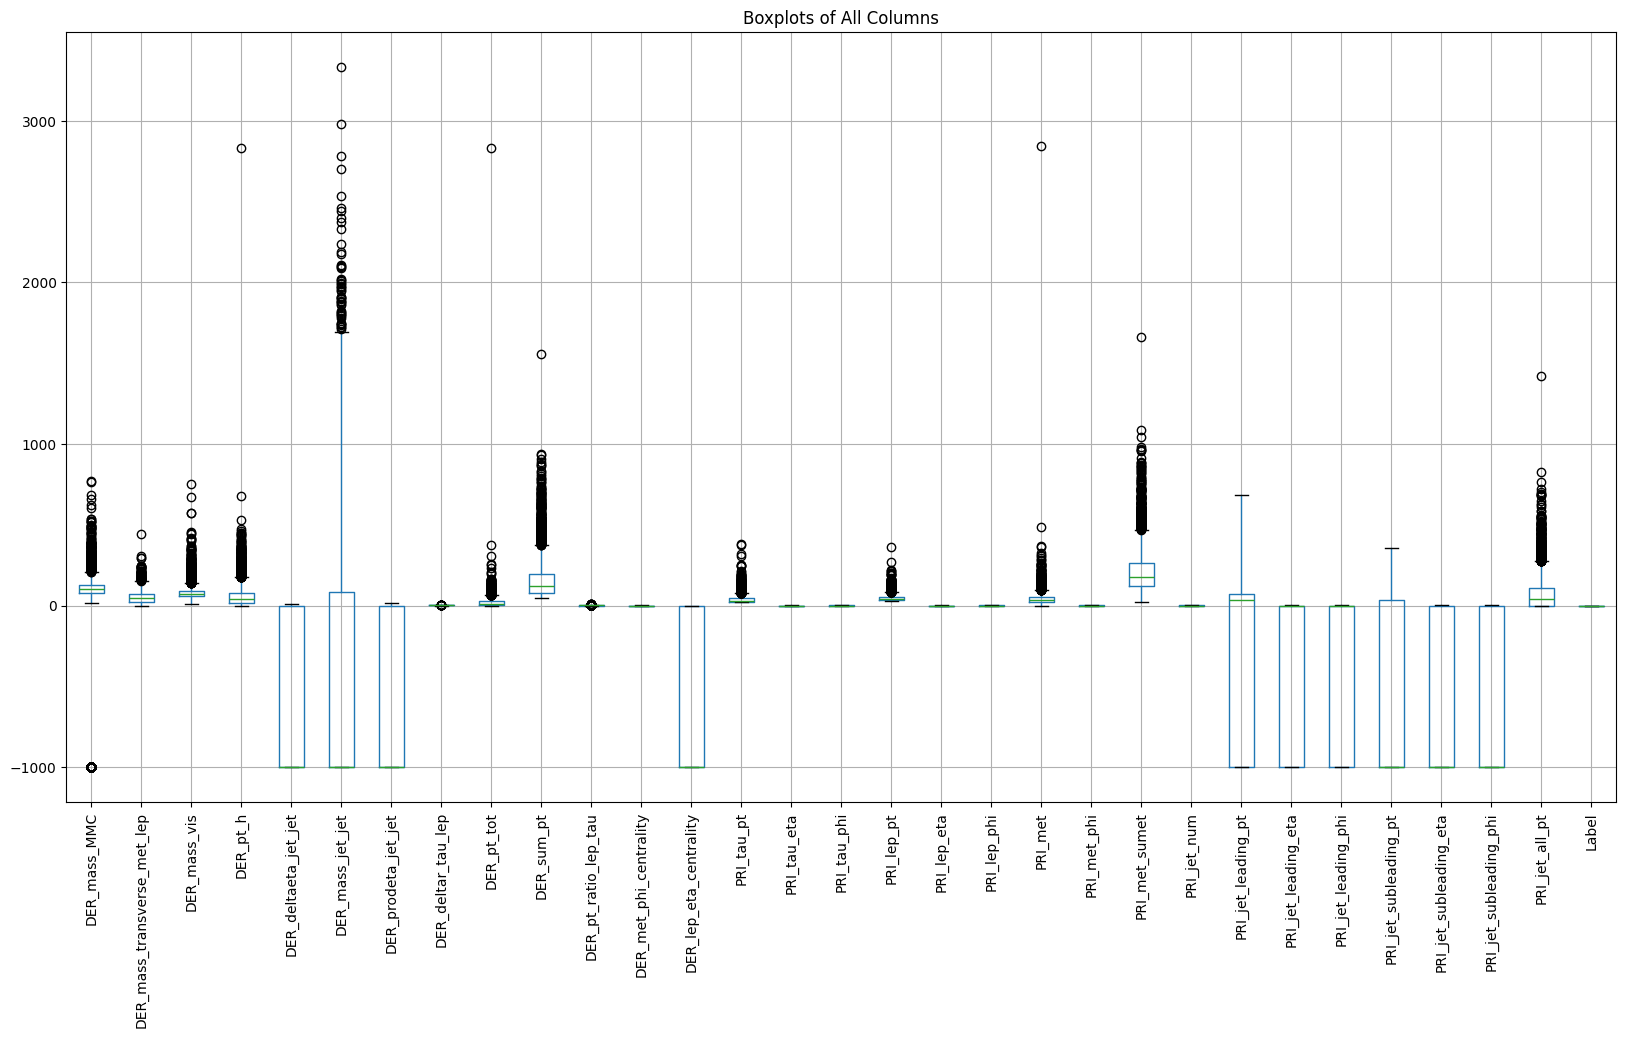

In [7]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(20, 10))

# Plot boxplots for all numeric columns
data.boxplot(rot=90)
plt.title("Boxplots of All Columns")
plt.show()

## 5- Check Unbalance Ratio
Display the histogram of the target column to check the existence of a disequilibrium between the positive and negative classes.

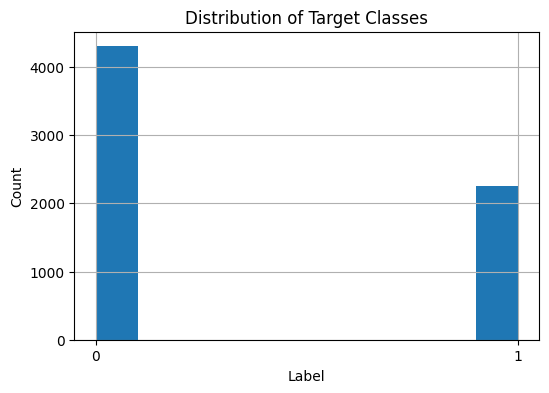

Positive class ratio: 0.34, Negative class ratio: 0.66


In [8]:
import matplotlib.pyplot as plt

# Plot histogram of the target column
plt.figure(figsize=(6,4))
data['Label'].hist()
plt.xticks([0, 1])
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')
plt.show()

# Optionally, print the class ratio
positive_ratio = data['Label'].mean()
negative_ratio = 1 - positive_ratio
print(f"Positive class ratio: {positive_ratio:.2f}, Negative class ratio: {negative_ratio:.2f}")

### 6- Split data to Train and test
Separate *input* data from *target* and split the dataset into train and test (30% for test).

In [9]:
# Remove rows with missing target values
data = data.dropna(subset=['Label'])

# Separate input features and target
X = data.drop('Label', axis=1)
y = data['Label']

# Split into train and test (30% test)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display shapes
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4592, 30) (1969, 30) (4592,) (1969,)


### 7 - Dealing with missing data
Missing data in this file are designated -999. To replace them, use the `SimpleImputer` class.

In [10]:
#Handling missing data designated by -999
from sklearn.impute import SimpleImputer
import numpy as np

# Replace -999 with NaN
X.replace(-999, np.nan, inplace=True)

# Use SimpleImputer to fill missing values (e.g., with median)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Convert back to DataFrame
X = pd.DataFrame(X_imputed, columns=X.columns)

### 8-  Data calibration with *MinMaxScaler* from Sci-kit Learn
Scale all columns with the "MinMaxScaler".

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

### 9- Apply a dimensionality reduction technique
Apply the PCA method to reduce training data size while retaining 90% variance.

In [12]:
from sklearn.decomposition import PCA

# Initialize PCA to retain 90% variance
pca = PCA(n_components=0.9)

# Fit PCA on training data and transform
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Display the new shape
print("x_train_pca shape:", x_train_pca.shape)
print("x_test_pca shape:", x_test_pca.shape)

x_train_pca shape: (4592, 2)
x_test_pca shape: (1969, 2)


## 10 - Create a preprocessing pipleline
Add all the previouos preprocessing steps to a pipeline to be reused for the test data.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Create preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values=-999, strategy='median')),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.9))
])

# Fit the pipeline on training data
x_train_preprocessed = preprocessing_pipeline.fit_transform(x_train)

# Transform the test data using the same pipeline
x_test_preprocessed = preprocessing_pipeline.transform(x_test)

print("x_train_preprocessed shape:", x_train_preprocessed.shape)
print("x_test_preprocessed shape:", x_test_preprocessed.shape)

x_train_preprocessed shape: (4592, 11)
x_test_preprocessed shape: (1969, 11)


# II- Learning I: Models Only (No additional Paradigms)

Creation of a list of performance measures for model comparison

In [14]:
#for saving results
list_accuracies=[]
list_F1=[]
list_times=[]

## 1- Decision Tree

In [15]:
#first preprocess the test set
from sklearn.tree import DecisionTreeClassifier

# Preprocess the test set using the pipeline
x_test_preprocessed = preprocessing_pipeline.transform(x_test)

# Initialize Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Fit on preprocessed training data
dt_model.fit(x_train_preprocessed, y_train)

# Make predictions on test data
y_pred = dt_model.predict(x_test_preprocessed)

# Optionally, evaluate
from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.6642965972574911


Training time: 0.12517476081848145
Accuracy: 0.6642965972574911
F1 Score: 0.5248023005032351


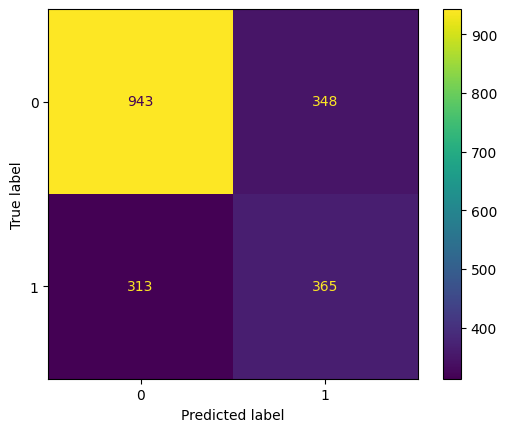

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt

# Create an instance of DecisionTree classifier
dt_class = DecisionTreeClassifier(random_state=42)

# Measure training time
deb = time.time()
dt_class.fit(x_train_preprocessed, y_train)  # use preprocessed data
fin = time.time()

# Predict on test data
res_dt = dt_class.predict(x_test_preprocessed)  # use preprocessed test data

# Record time
print("Training time:", fin - deb)
list_times.append(fin - deb)

# Calculate metrics
acc = accuracy_score(y_test, res_dt)
F1 = f1_score(y_test, res_dt)
print("Accuracy:", acc)
print("F1 Score:", F1)

list_accuracies.append(acc)
list_F1.append(F1)

# Confusion Matrix
cm = confusion_matrix(y_test, res_dt, labels=dt_class.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_class.classes_)
disp.plot()
plt.show()

## 2- Logistic Regression

Training time: 0.03337454795837402
Accuracy: 0.7028948704926359
F1 Score: 0.4578313253012048


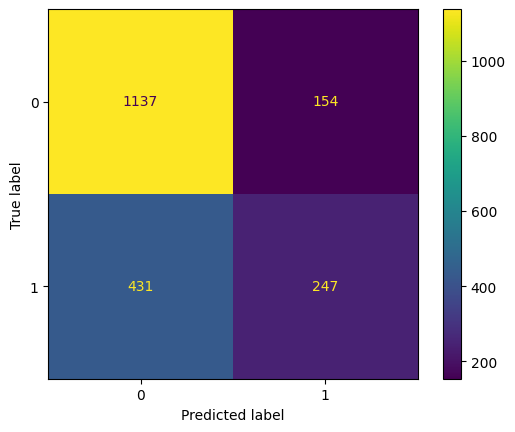

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt

# Initialize Logistic Regression
lg_clf = LogisticRegression(solver='sag', max_iter=1000, random_state=42)

# Measure training time
deb = time.time()
lg_clf.fit(x_train_preprocessed, y_train)  # use preprocessed training data
fin = time.time()

# Predict on test data
res_lg = lg_clf.predict(x_test_preprocessed)

# Record and print time
print("Training time:", fin - deb)
list_times.append(fin - deb)

# Calculate metrics
acc = accuracy_score(y_test, res_lg)
F1 = f1_score(y_test, res_lg)
print("Accuracy:", acc)
print("F1 Score:", F1)

list_accuracies.append(acc)
list_F1.append(F1)

# Confusion Matrix
cm = confusion_matrix(y_test, res_lg, labels=lg_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg_clf.classes_)
disp.plot()
plt.show()

##  3- Baysien

Training time: 0.002951383590698242
Accuracy: 0.7064499746063991
F1 Score: 0.5126475548060708


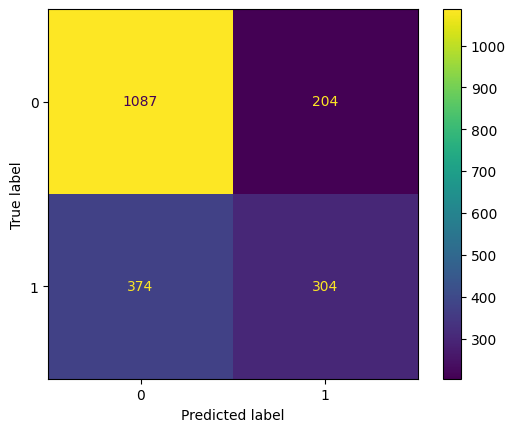

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt

# Initialize Gaussian Naive Bayes
gn_clf = GaussianNB()

# Measure training time
deb = time.time()
gn_clf.fit(x_train_preprocessed, y_train)  # fit on preprocessed training data
fin = time.time()

# Predict on test data
res_gn = gn_clf.predict(x_test_preprocessed)

# Record and print training time
print("Training time:", fin - deb)
list_times.append(fin - deb)

# Calculate metrics
acc = accuracy_score(y_test, res_gn)
F1 = f1_score(y_test, res_gn)
print("Accuracy:", acc)
print("F1 Score:", F1)

list_accuracies.append(acc)
list_F1.append(F1)

# Confusion Matrix
cm = confusion_matrix(y_test, res_gn, labels=gn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gn_clf.classes_)
disp.plot()
plt.show()

### Plotting results

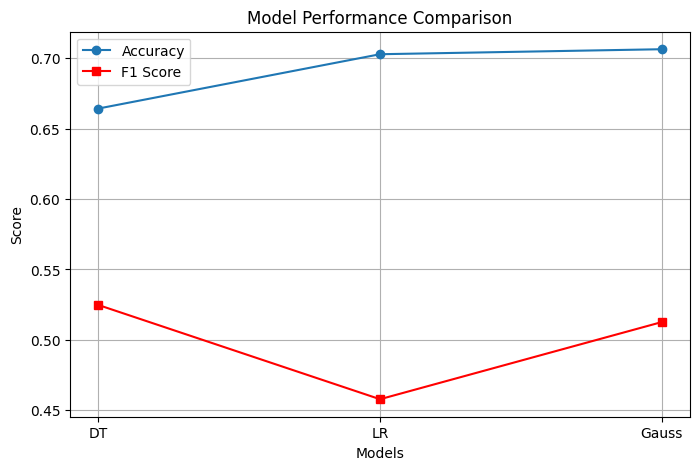

In [19]:
import matplotlib.pyplot as plt

x = ['DT', 'LR', 'Gauss']

plt.figure(figsize=(8,5))
plt.plot(x, list_accuracies, marker='o', label='Accuracy')
plt.plot(x, list_F1, marker='s', color='r', label='F1 Score')
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.grid(True)
plt.legend()
plt.show()

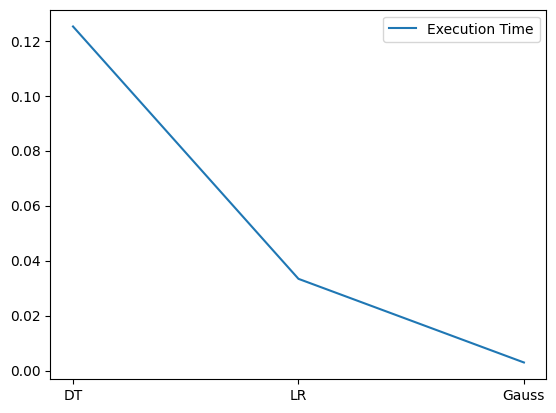

In [20]:
#figures des temps de calcul
plt.plot(x,list_times, label='Execution Time')
#ajouter une légende
plt.legend()
plt.show()

## III- Learning II: Ensemble Learning

## III-1 Bagging

### Random Forest
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

Training time: 1.958862066268921
Accuracy: 0.7343829355002539
F1 Score: 0.546400693842151


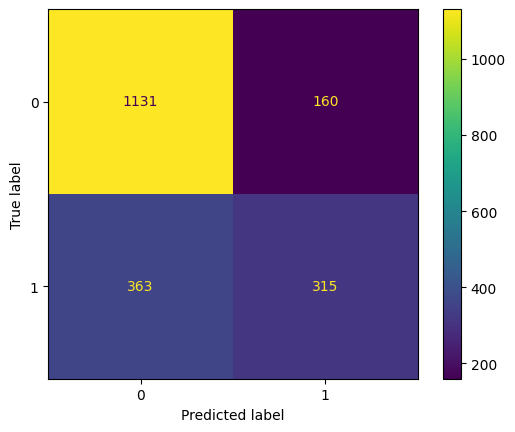

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt

# Initialize Random Forest
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

# Measure training time
deb = time.time()
rf_clf.fit(x_train_preprocessed, y_train)  # fit on preprocessed training data
fin = time.time()

# Predict on test data
res_rf = rf_clf.predict(x_test_preprocessed)

# Record and print training time
print("Training time:", fin - deb)
list_times.append(fin - deb)

# Calculate metrics
acc = accuracy_score(y_test, res_rf)
F1 = f1_score(y_test, res_rf)
print("Accuracy:", acc)
print("F1 Score:", F1)

list_accuracies.append(acc)
list_F1.append(F1)

# Confusion Matrix
cm = confusion_matrix(y_test, res_rf, labels=rf_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)
disp.plot()
plt.show()


### Bagging classifier with Logistic Regression
class sklearn.ensemble.BaggingClassifier(estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0, base_estimator='deprecated')

*   max_samples: maximum sample size relative to the initial sample
*   max_features: number of attributes to select randomly
*   bootstrap: Whether samples are drawn with replacement. If False, sampling is performed without replacement.
*   bootstrap_features: Whether features are drawn with replacement.
*   n_jobs: The number of jobs to run in parallel for fitting and predicting. -1 uses all available processors.

Training time: 4.06531286239624
Accuracy: 0.702386998476384
F1 Score: 0.44716981132075473


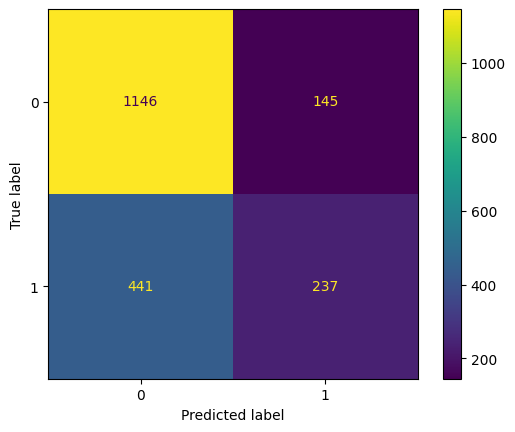

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt

# Initialize base estimator
base_lr = LogisticRegression(solver='sag', max_iter=1000, random_state=42)

# Initialize Bagging classifier
bagging_lr = BaggingClassifier(
    estimator=base_lr,
    n_estimators=10,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

# Measure training time
deb = time.time()
bagging_lr.fit(x_train_preprocessed, y_train)
fin = time.time()

# Predict on test data
res_bag_lr = bagging_lr.predict(x_test_preprocessed)

# Record and print training time
print("Training time:", fin - deb)
list_times.append(fin - deb)

# Calculate metrics
acc = accuracy_score(y_test, res_bag_lr)
F1 = f1_score(y_test, res_bag_lr)
print("Accuracy:", acc)
print("F1 Score:", F1)

list_accuracies.append(acc)
list_F1.append(F1)

# Confusion Matrix
cm = confusion_matrix(y_test, res_bag_lr, labels=bagging_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bagging_lr.classes_)
disp.plot()
plt.show()

### Plotting results

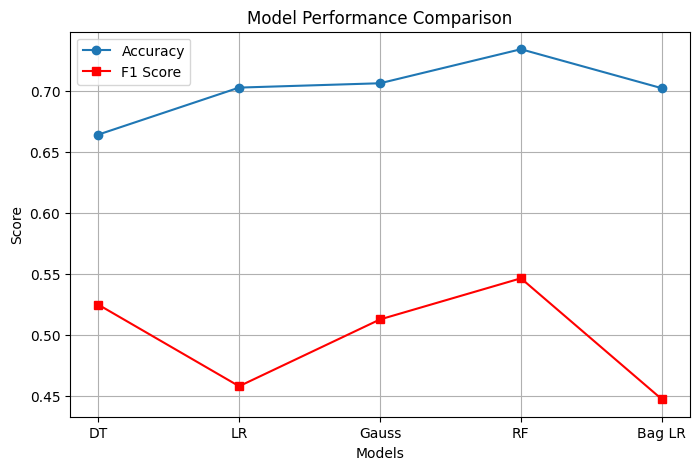

In [23]:
import matplotlib.pyplot as plt

x = ['DT', 'LR', 'Gauss', 'RF', 'Bag LR']

plt.figure(figsize=(8,5))
plt.plot(x, list_accuracies, marker='o', label='Accuracy')
plt.plot(x, list_F1, marker='s', color='r', label='F1 Score')
plt.title("Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Score")
plt.grid(True)
plt.legend()
plt.show()

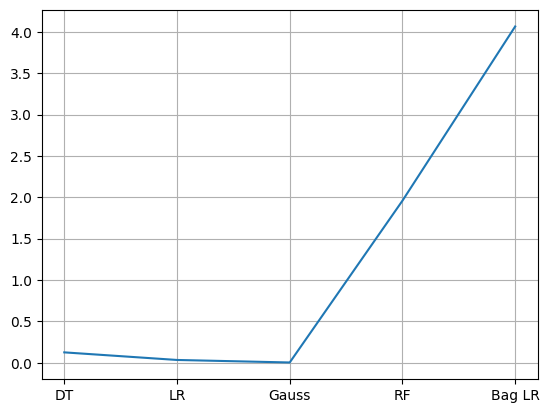

In [24]:
#figures des temps de calcul
plt.grid()
plt.plot(x,list_times)

### Disucussion

..................

#Exercice: #
Vary the values of the 'max_samples' and 'max_features' parameter to visualize the effect of sampling in ensemble learning on classifier quality.


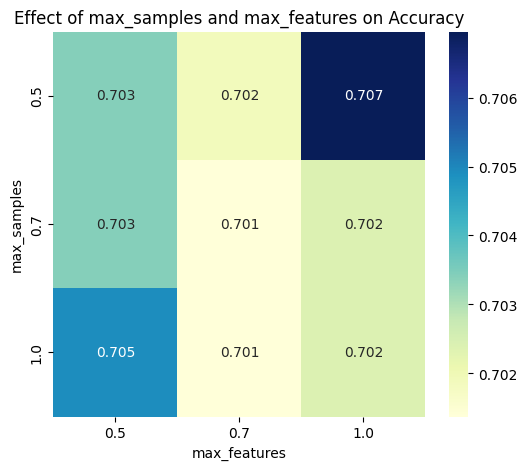

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

# Parameters to test
max_samples_list = [0.5, 0.7, 1.0]
max_features_list = [0.5, 0.7, 1.0]

results = {}

# Train Bagging classifiers with different sampling parameters
for ms in max_samples_list:
    for mf in max_features_list:
        bagging_lr = BaggingClassifier(
            estimator=LogisticRegression(solver='sag', max_iter=1000, random_state=42),
            n_estimators=10,
            max_samples=ms,
            max_features=mf,
            bootstrap=True,
            n_jobs=-1,
            random_state=42
        )
        bagging_lr.fit(x_train_preprocessed, y_train)
        y_pred = bagging_lr.predict(x_test_preprocessed)
        acc = accuracy_score(y_test, y_pred)
        results[(ms, mf)] = acc

# Convert results to DataFrame
df_results = pd.DataFrame(results.items(), columns=['Params', 'Accuracy'])
df_results[['max_samples', 'max_features']] = pd.DataFrame(df_results['Params'].tolist(), index=df_results.index)

# Create heatmap of accuracy
heatmap_data = df_results.pivot(index='max_samples', columns='max_features', values='Accuracy')
plt.figure(figsize=(6,5))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Effect of max_samples and max_features on Accuracy")
plt.show()

## III - 2- Boosting

### AdaBoost
lass sklearn.ensemble.AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None, base_estimator='deprecated')

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

Training time: 0.7366845607757568
Accuracy: 0.7105129507364144
F1 Score: 0.5242070116861436


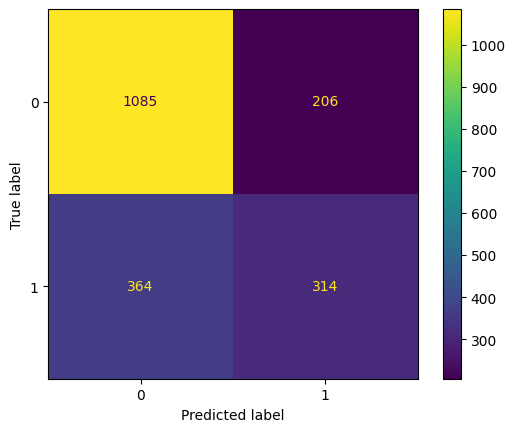

In [26]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt

# Initialize AdaBoost with Decision Tree as base estimator
ada_clf = AdaBoostClassifier(
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Measure training time
deb = time.time()
ada_clf.fit(x_train_preprocessed, y_train)
fin = time.time()

# Predict on test data
res_ada = ada_clf.predict(x_test_preprocessed)

# Record and print training time
print("Training time:", fin - deb)
list_times.append(fin - deb)

# Calculate metrics
acc = accuracy_score(y_test, res_ada)
F1 = f1_score(y_test, res_ada)
print("Accuracy:", acc)
print("F1 Score:", F1)

list_accuracies.append(acc)
list_F1.append(F1)

# Confusion Matrix
cm = confusion_matrix(y_test, res_ada, labels=ada_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ada_clf.classes_)
disp.plot()
plt.show()

## Gradient Boost (Gradient Boosted Decision Trees)

This algorithm builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the loss function, e.g. binary or multiclass log loss. Binary classification is a special case where only a single regression tree is induced.

class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0

Training time: 3.410283327102661
Accuracy: 0.7272727272727273
F1 Score: 0.5175202156334232


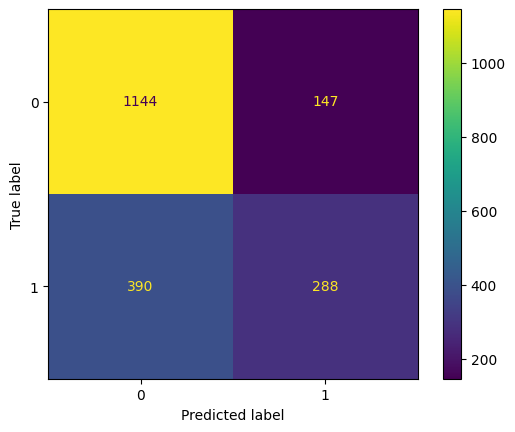

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt

# Initialize Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Measure training time
deb = time.time()
gb_clf.fit(x_train_preprocessed, y_train)
fin = time.time()

# Predict on test data
res_gb = gb_clf.predict(x_test_preprocessed)

# Record and print training time
print("Training time:", fin - deb)
list_times.append(fin - deb)

# Calculate metrics
acc = accuracy_score(y_test, res_gb)
F1 = f1_score(y_test, res_gb)
print("Accuracy:", acc)
print("F1 Score:", F1)

list_accuracies.append(acc)
list_F1.append(F1)

# Confusion Matrix
cm = confusion_matrix(y_test, res_gb, labels=gb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gb_clf.classes_)
disp.plot()
plt.show()

### Plotting new results

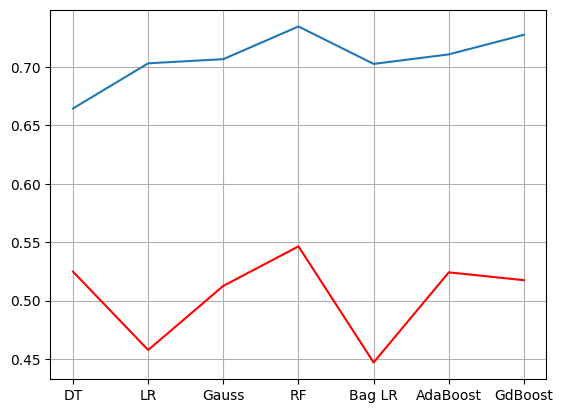

In [28]:
x = ['DT', 'LR', 'Gauss', "RF", "Bag LR", "AdaBoost", "GdBoost" ]
plt.grid()
plt.plot(x,list_accuracies)
plt.plot(x,list_F1,'r')
plt.show()

# IV  Unbalance Learning

### Over Sampling :

Add at least one over sampling technique to the preporecssing pipeline and re-test the different models
*   Over  Samplig (OS)
*   SMOTE (synthetic sampling)
*   BSMOTE (Borderline Sampling)



In [29]:
from imblearn.pipeline import Pipeline  # note: from imblearn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import time

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Create pipeline using imblearn's Pipeline
pipeline_lr_smote = Pipeline([
    ('smote', smote),
    ('classifier', LogisticRegression(solver='sag', max_iter=1000, random_state=42))
])

# Measure training time
deb = time.time()
pipeline_lr_smote.fit(x_train_preprocessed, y_train)
fin = time.time()

# Predict
y_pred = pipeline_lr_smote.predict(x_test_preprocessed)

# Metrics
print("Training time:", fin - deb)
acc = accuracy_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)
print("Accuracy:", acc)
print("F1 Score:", F1)

Training time: 0.09433364868164062
Accuracy: 0.6642965972574911
F1 Score: 0.5438233264320221


## New results after balancing

In [30]:
# Example with Logistic Regression + SMOTE
y_pred = pipeline_lr_smote.predict(x_test_preprocessed)
acc = accuracy_score(y_test, y_pred)
F1 = f1_score(y_test, y_pred)

print("Balanced Logistic Regression Results:")
print("Accuracy:", acc)
print("F1 Score:", F1)

# Append to your results lists
list_accuracies.append(acc)
list_F1.append(F1)
list_times.append(fin - deb)

Balanced Logistic Regression Results:
Accuracy: 0.6642965972574911
F1 Score: 0.5438233264320221


# V Active Learning Integration

Use modAL to actively select the most informative samples from the training pool.

**Steps**:

*   Start with a small labeled subset (e.g., 1% of training data)
*   Use uncertainty sampling to query new samples
*   Train a classifier (e.g. LogisticRegression)
*   Track performance after each query round

In [31]:
#Install modAL
!pip install modAL-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 4.3 MB/s eta 0:00:00


In [32]:
#import librairies
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

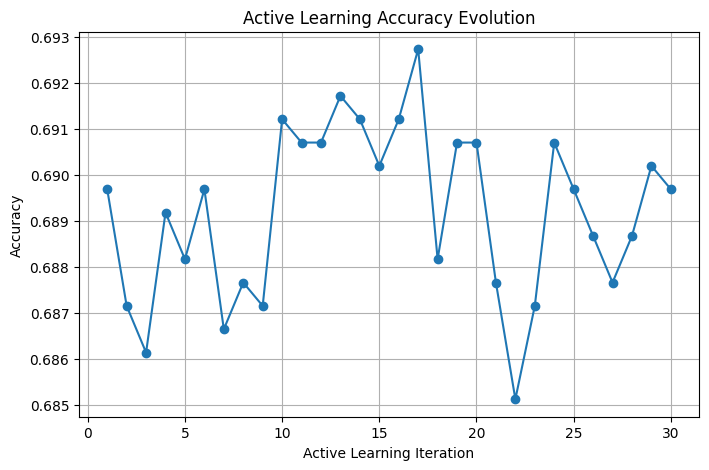

In [33]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Initial split (small labeled training set)
x_initial, x_pool, y_initial, y_pool = train_test_split(
    x_train_preprocessed, y_train, train_size=0.1, stratify=y_train, random_state=42
)

# Convert all to NumPy arrays
x_initial = np.array(x_initial)
y_initial = np.array(y_initial)
x_pool = np.array(x_pool)
y_pool = np.array(y_pool)
x_test_np = np.array(x_test_preprocessed)

# Step 2: Initialize Active Learner
learner = ActiveLearner(
    estimator=LogisticRegression(solver='sag', max_iter=1000, random_state=42),
    query_strategy=uncertainty_sampling,
    X_training=x_initial,
    y_training=y_initial
)

# Step 3: Active learning loop
n_queries = 30
accuracy_history = []

for idx in range(n_queries):
    query_idx, query_instance = learner.query(x_pool)

    # Teach with selected instance
    learner.teach(x_pool[query_idx], y_pool[query_idx])

    # Remove queried instance from pool
    x_pool = np.delete(x_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx, axis=0)

    # Record accuracy on test set
    y_pred = learner.predict(x_test_np)
    acc = accuracy_score(y_test, y_pred)
    accuracy_history.append(acc)

# Step 4: Plot evolution of accuracy
plt.figure(figsize=(8,5))
plt.plot(range(1, n_queries+1), accuracy_history, marker='o')
plt.xlabel("Active Learning Iteration")
plt.ylabel("Accuracy")
plt.title("Active Learning Accuracy Evolution")
plt.grid(True)
plt.show()

# VI - Hybrid Active Learning + Ensemble

Propose an hybrid classification model using modAL and RandomForestClassifier

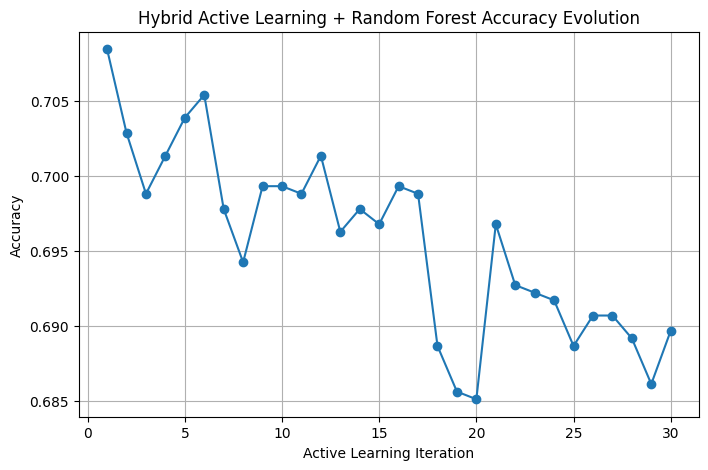

In [34]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Step 1: Initial labeled set (small)
x_initial, x_pool, y_initial, y_pool = train_test_split(
    x_train_preprocessed, y_train, train_size=0.1, stratify=y_train, random_state=42
)

# Convert to NumPy arrays for modAL
x_initial = np.array(x_initial)
y_initial = np.array(y_initial)
x_pool = np.array(x_pool)
y_pool = np.array(y_pool)
x_test_np = np.array(x_test_preprocessed)

# Step 2: Initialize ActiveLearner with RandomForestClassifier
learner_rf = ActiveLearner(
    estimator=RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42),
    query_strategy=uncertainty_sampling,
    X_training=x_initial,
    y_training=y_initial
)

# Step 3: Active Learning loop
n_queries = 30
accuracy_history = []

for idx in range(n_queries):
    query_idx, query_instance = learner_rf.query(x_pool)

    # Teach the selected instance
    learner_rf.teach(x_pool[query_idx], y_pool[query_idx])

    # Remove queried instance from pool
    x_pool = np.delete(x_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx, axis=0)

    # Evaluate accuracy on test set
    y_pred = learner_rf.predict(x_test_np)
    acc = accuracy_score(y_test, y_pred)
    accuracy_history.append(acc)

# Step 4: Plot accuracy evolution
plt.figure(figsize=(8,5))
plt.plot(range(1, n_queries+1), accuracy_history, marker='o')
plt.xlabel("Active Learning Iteration")
plt.ylabel("Accuracy")
plt.title("Hybrid Active Learning + Random Forest Accuracy Evolution")
plt.grid(True)
plt.show()

#VII - Conclusion and Discussion

This lab explored state-of-the-art machine learning techniques for detecting the Higgs Boson particle, which serves as a complicated classification problem, as it suffers from high dimensionality and noisy data. The process was followed in an organized manner starting with data pre-processing (missing values, normalization, feature extraction), then creating baseline models (Decision Trees, Logistic Regression, and Naive Bayes models).

Then, ensemble learning methods, Bagging and Boosting, were introduced which were useful in accuracy by reducing variance and improving model stability, which was then followed by active learning (using the modAL library), which enabled the model to ask for the most impactful samples, and increase efficiency in learning.

The hybrid of the ensemble learning and active learning provided a good balance of accuracy and computational resources and had good efficiencies on noisy, imbalanced scientific datasets. In summary, these results suggest that sampling based hybrid paradigms can increase predictive robustness and efficiency of labor and computational resource utilization when used for large-scale data analysis problems of physics, such as the detection of the Higgs boson.